In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


In [2]:
type(train_images)

numpy.ndarray

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# Get 16 images at random
import random
random.seed(1)
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 16)
sampler

[8805,
 37303,
 55537,
 52577,
 50054,
 4135,
 16716,
 7727,
 32468,
 49870,
 29457,
 30949,
 42702,
 24878,
 51689,
 13759]

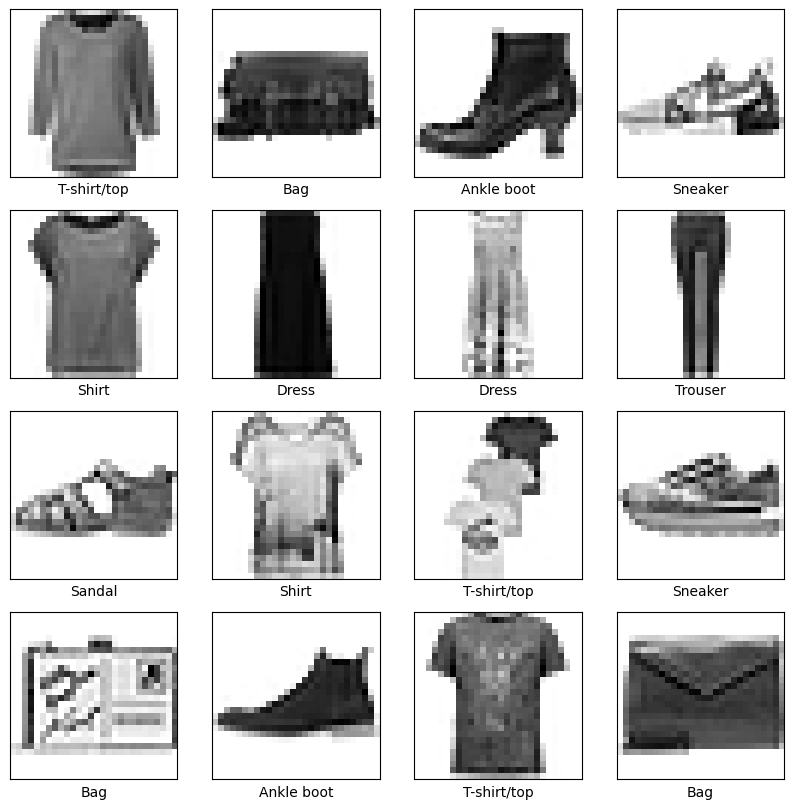

In [8]:
plt.figure(figsize=(10, 10))
for i in range(len(sampler)):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[sampler[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[sampler[i]]])
plt.show()


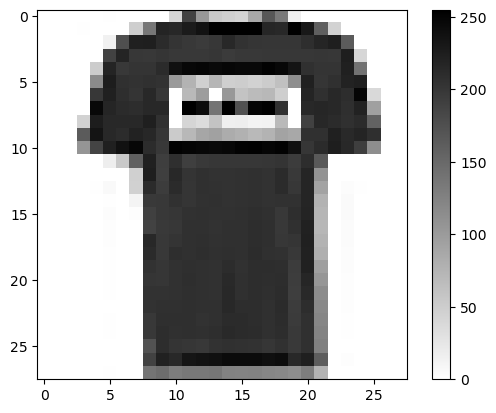

In [9]:
random_image_id = 1
plt.figure()
plt.imshow(train_images[random_image_id],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
class_names[train_labels[random_image_id]]

'T-shirt/top'

In [12]:
train_images[random_image_id]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [13]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

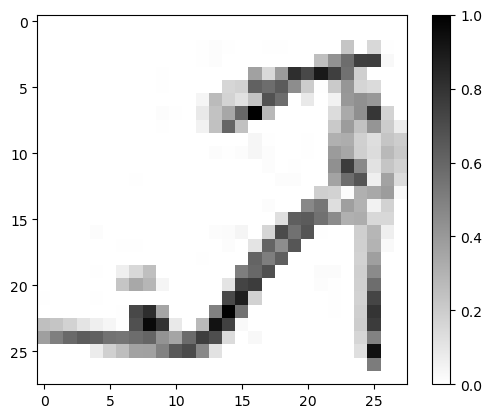

In [14]:
plt.figure()
plt.imshow(train_images[8], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
#build
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
 56/844 [>.............................] - ETA: 0s - loss: 1.0801 - accuracy: 0.6370  

2023-09-04 22:15:22.252627: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


844/844 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.8141 - val_loss: 0.4135 - val_accuracy: 0.8547
Epoch 2/10
844/844 [==============================] - 1s 999us/step - loss: 0.3763 - accuracy: 0.8641 - val_loss: 0.3491 - val_accuracy: 0.8673
Epoch 3/10
844/844 [==============================] - 1s 942us/step - loss: 0.3374 - accuracy: 0.8775 - val_loss: 0.3455 - val_accuracy: 0.8698
Epoch 4/10
844/844 [==============================] - 1s 984us/step - loss: 0.3122 - accuracy: 0.8841 - val_loss: 0.3515 - val_accuracy: 0.8727
Epoch 5/10
844/844 [==============================] - 1s 999us/step - loss: 0.2956 - accuracy: 0.8900 - val_loss: 0.3194 - val_accuracy: 0.8837
Epoch 6/10
844/844 [==============================] - 1s 932us/step - loss: 0.2797 - accuracy: 0.8968 - val_loss: 0.3464 - val_accuracy: 0.8782
Epoch 7/10
844/844 [==============================] - 1s 977us/step - loss: 0.2714 - accuracy: 0.8984 - val_loss: 0.3611 - val_accuracy: 0.8787
Epoch